
#  3 kinds of sampling

##  Assignment 

You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.

You'll use the `RelationshipSatisfaction` column of the `attrition_pop` dataset, which categorizes the employee's relationship with the company. It has four levels: `Low`, `Medium`, `High`, and `Very_High`. `pandas` has been loaded with its usual alias, and the `random` package has been loaded.

##  Pre exercise code 

```
import pandas as pd
import random
import numpy as np
random.seed(2019)
attrition_pop = pd.read_feather(
  path = "/usr/local/share/datasets/attrition.feather"
)


# Added 2022-09-05 by James to make sure that Step 3 can never throw an error due to it choosing a cluster with fewer rows than one-quarter of the population.
def my_function(sequence, k):
  if sorted(sequence) == sorted(list(attrition_pop['RelationshipSatisfaction'].unique())):
    return(['High', 'Very_High'])
    
  else:
    random_arr = np.random.choice(sequence, size=k, replace=False)
    return(list(random_arr))

random.sample = my_function
```


In [75]:
import pandas as pd
import random
import numpy as np
random.seed(2019)
attrition_pop = pd.read_feather(
  path = "attrition.feather"
)


# Added 2022-09-05 by James to make sure that Step 3 can never throw an error due to it choosing a cluster with fewer rows than one-quarter of the population.
def my_function(sequence, k):
  if sorted(sequence) == sorted(list(attrition_pop['RelationshipSatisfaction'].unique())):
    return(['High', 'Very_High'])
    
  else:
    random_arr = np.random.choice(sequence, size=k, replace=False)
    return(list(random_arr))

random.sample = my_function



##  Instructions 

- Perform simple random sampling on `attrition_pop` to get one-quarter of the population, setting the seed to `2022`.



In [77]:
att_sample = attrition_pop.sample(frac=0.25, random_state=2022)

- Perform stratified sampling on `attrition_pop` to sample one-quarter of each `RelationshipSatisfaction` group, setting the seed to `2022`.


In [78]:
att_strat_sample = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=0.25, random_state=2022)

C:\Users\ROYAL\AppData\Local\Temp\ipykernel_10672\3081455543.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  att_strat_sample = attrition_pop.groupby('RelationshipSatisfaction').sample(frac=0.25, random_state=2022)



- Create a list of unique values from `attrition_pop`'s `RelationshipSatisfaction` column.
- Randomly sample `satisfaction_unique` to get two values.
- Subset the population for rows where `RelationshipSatisfaction` is in `satisfaction_samp` and clear any unused categories from `RelationshipSatisfaction`; assign to `attrition_clust_prep`.
- Perform cluster sampling on the selected satisfaction groups, sampling one quarter of the **population** and setting the seed to `2022`.



In [82]:
rel_values = list(attrition_pop['RelationshipSatisfaction'].unique())
rel_sample = random.sample(rel_values, k=2)
att_subset = attrition_pop[attrition_pop['RelationshipSatisfaction'].isin(rel_sample)]
att_subset.loc[:, 'RelationshipSatisfaction'] = att_subset['RelationshipSatisfaction'].cat.remove_unused_categories()

C:\Users\ROYAL\AppData\Local\Temp\ipykernel_10672\1942380034.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Very_High', 'Very_High', 'High', 'Very_High', 'High', ..., 'Very_High', 'Very_High', 'High', 'Very_High', 'Very_High']
Length: 891
Categories (2, object): ['High' < 'Very_High']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  att_subset.loc[:, 'RelationshipSatisfaction'] = att_subset['RelationshipSatisfaction'].cat.remove_unused_categories()


<Axes: >

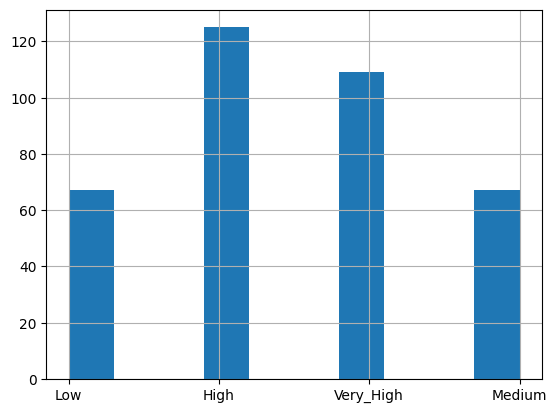

In [86]:
att_sample['RelationshipSatisfaction'].hist()

<Axes: >

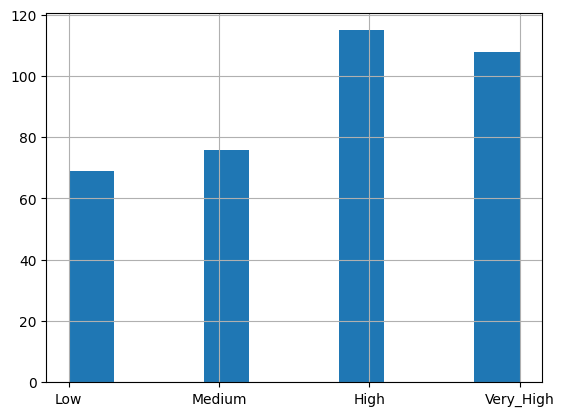

In [87]:
att_strat_sample['RelationshipSatisfaction'].hist()

<Axes: >

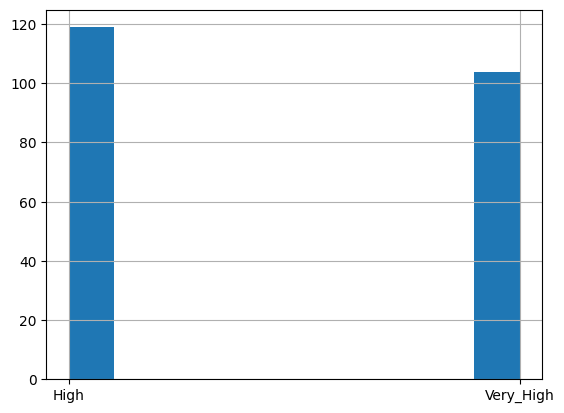

In [88]:
att_subset.sample(frac=0.25, random_state=2022)['RelationshipSatisfaction'].hist()